In [212]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [213]:
lp = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/data/preprocessed_data/HTNet_data/HTNet_data.hdf5'
preprocessed_data = h5py.File(lp, 'r')

train_x = preprocessed_data['train_x']
train_y = preprocessed_data['train_y']
test_x = preprocessed_data['test_x']
test_y = preprocessed_data['test_y']

subject_ids = ['EC01', 'EC02', 'EC03', 'EC04', 'EC05', 'EC06', 'EC07', 'EC08', 'EC09', 'EC10',
                    'EC11', 'EC12']

In [214]:
id = subject_ids[6]
print('subject ' + id)

# get data and labels
X = np.asarray(train_x[id])
X = X[:, :64, :]

# some trials have zeros for all the channels.
bad_trials = np.unique(np.where(X==0)[0])
if not len(bad_trials) == 0:
    X = np.delete(X, bad_trials, 0)

X = np.log(X)
y = np.asarray(train_y[id])

# separate rest and movement data
X_rest = [X[tr,:,:] for tr in range(X.shape[0]) if y[tr] == 1]
X_rest = np.asarray(X_rest)

X_move = [X[tr,:,:] for tr in range(X.shape[0]) if y[tr] == 2]
X_move = np.asarray(X_move)

# calculate mean
X_rest_mean = np.mean(X_rest, axis=0)
X_move_mean = np.mean(X_move, axis=0)

# plot results
nrow = 8
ncol = 8

subject EC07


subject EC07


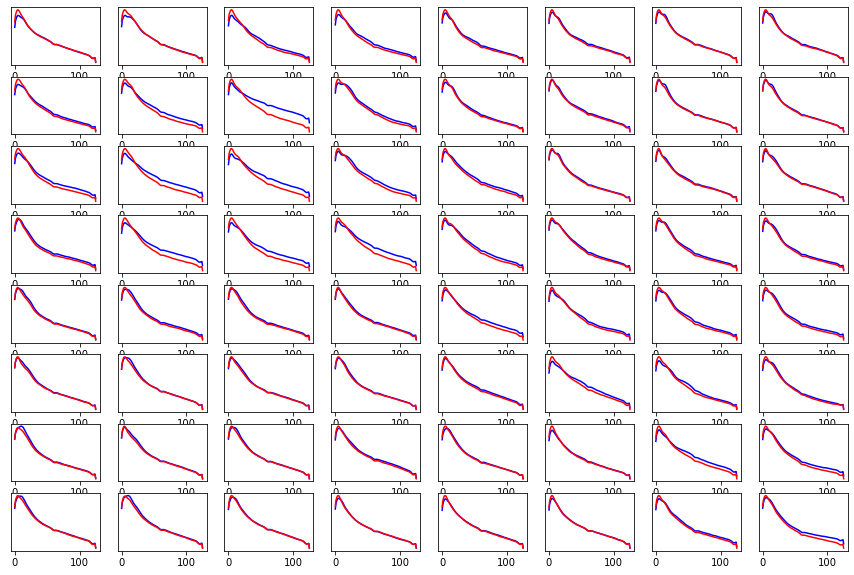

In [215]:
print('subject ' + id)

fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15,10))
fig.patch.set_facecolor('white')

for i, ax in enumerate(fig.axes):
    ax.plot(X_move_mean[i, :], color='b')
    ax.plot(X_rest_mean[i, :], color='r')
    #ax.set_ylim([-1,1])
    ax.set_yticks([])
    # ax.set_xticks([])

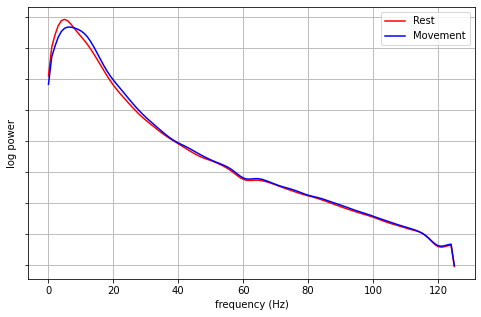

In [216]:
fig = plt.figure(figsize=(8,5))
fig.patch.set_facecolor('white')

plt.plot(X_rest_mean[58, :], color='r', label='Rest')
plt.plot(X_move_mean[58, :], color='b', label='Movement')
plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('log power')
plt.gca().axes.yaxis.set_ticklabels([])  # to hide y values (meaningless in this case)
plt.legend()

subject EC07


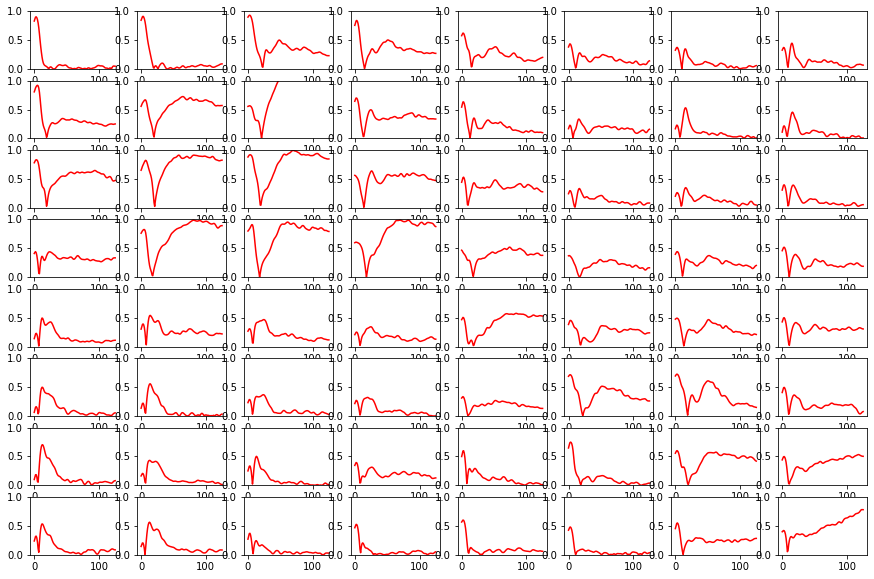

In [217]:
print('subject ' + id)

fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15,10))
for i, ax in enumerate(fig.axes):
    ax.plot(np.abs(np.subtract(X_move_mean[i, :],X_rest_mean[i, :])), color='r')
    ax.set_ylim([0,1])

subject EC07


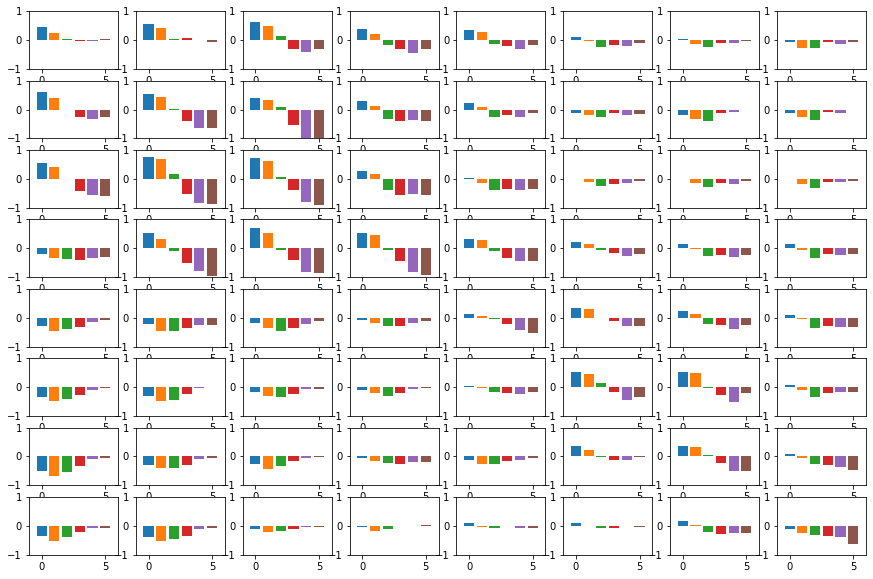

In [218]:
ranges = [range(7, 13), range(10, 14), range(14, 26), range(26, 36), range(36, 70), range(76, 125)]
#ranges = [range(0, 13),  range(36, 70), range(76, 125)]

rest_averaged = [np.mean(X_rest_mean[:,band], axis=1) for band in ranges]
rest_averaged = np.transpose(np.asarray(rest_averaged))
move_averaged = np.asarray([np.mean(X_move_mean[:,band], axis=1) for band in ranges])
move_averaged = np.transpose(np.asarray(move_averaged))

diff_averaged = np.subtract(rest_averaged, move_averaged)

print('subject ' + id)

fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15,10))
fig.patch.set_facecolor('white')

for i, ax in enumerate(fig.axes):
    for r, band in enumerate(ranges):
        if np.abs(diff_averaged[i, r]) > 0:
            ax.bar(r, diff_averaged[i, r])
    ax.set_ylim([-1,1])
    ax.set_xlim([-1,len(ranges)])

subject EC07


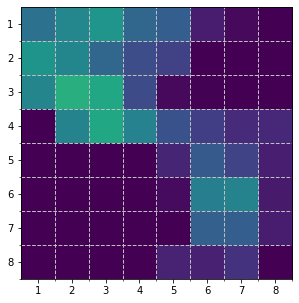

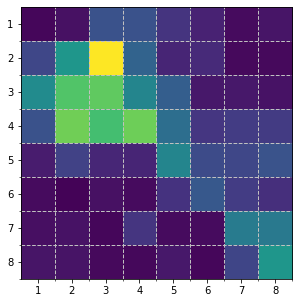

In [219]:
def custom_plot(data):
    fig = plt.figure(figsize=(8,5))
    #fig.patch.set_facecolor('white')
    plt.imshow(data, vmin = 0, vmax = 1.2)

    ax = plt.gca()

    # Major ticks
    ax.set_xticks(np.arange(0, 8, 1))
    ax.set_yticks(np.arange(0, 8, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(1, 8+1, 1))
    ax.set_yticklabels(np.arange(1, 8+1, 1))

    # Minor ticks
    ax.set_xticks(np.arange(.5, 8, 1), minor=True)
    ax.set_yticks(np.arange(.5, 8, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='silver', linestyle='--', linewidth=1)
    plt.show()

lfb_diff = diff_averaged[:,0].reshape(8, 8)
hfb_diff = diff_averaged[:,-1].reshape(8, 8)

print('subject ' + id)

custom_plot(lfb_diff)
custom_plot(np.abs(hfb_diff))